In [2]:
import joblib
from PIL import Image
import pandas as pd
import ipyplot
import numpy as np
from plantcv import plantcv as pcv
from os import listdir, path
from natsort import natsorted
import matplotlib.pyplot as plt
import math

In [4]:
mypath = 'test'
# get all image names in path
files = natsorted([path.join(mypath, f) for f in listdir(mypath) if path.isfile(path.join(mypath, f))])

In [5]:
images = [pcv.readimage(im, "native")[0] for im in files]

In [6]:
mean_brightness = [np.mean(pcv.rgb2gray_hsv(img, 'v')/250) for img in images]
var_brightness = [np.var(pcv.rgb2gray_hsv(img, 'v')/250) for img in images]
frame = pd.DataFrame(np.transpose([mean_brightness, var_brightness]), columns=['brightness_mean','brightness_var'])

In [7]:
# Load the model from the file
NB = joblib.load('day_night_model.joblib')
# Use the loaded model to make predictions
predictions = NB.predict(frame)

In [6]:
images = []
for c,file in enumerate(files):
    image = Image.open(file)
    image.filename = ''
    images.append(image)


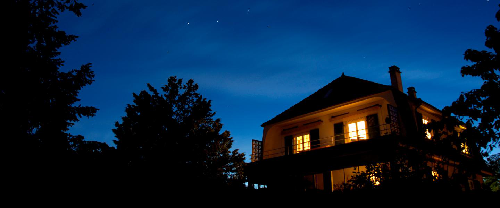
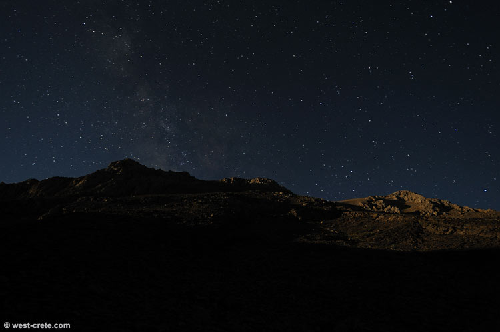
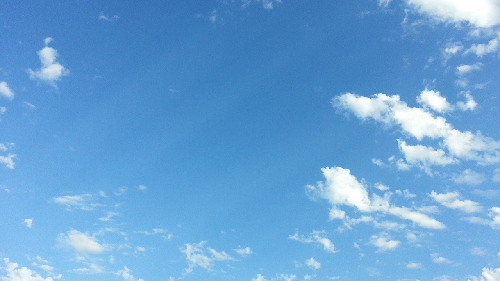
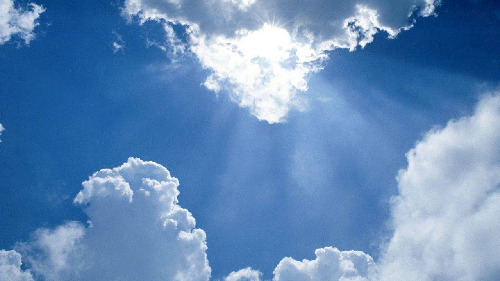
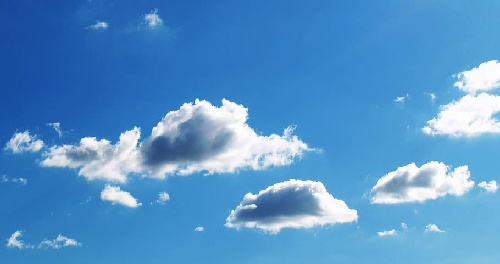
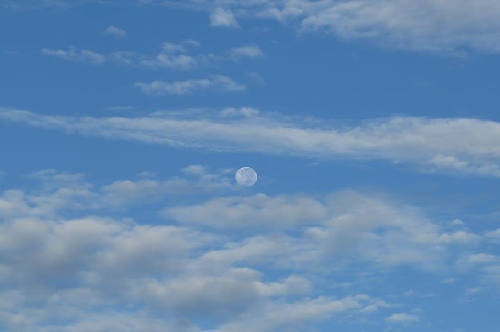
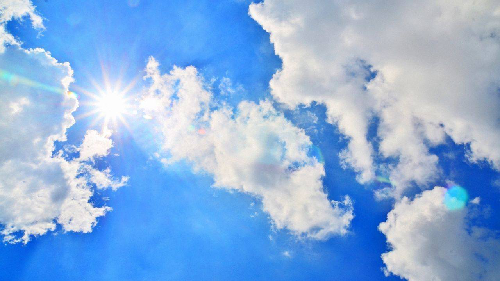
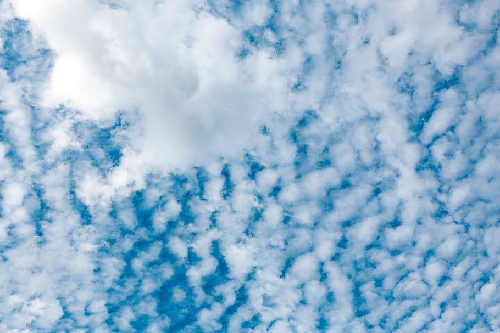
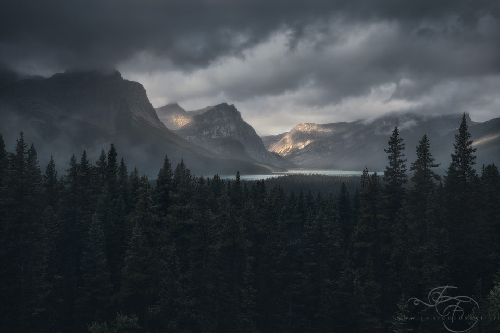
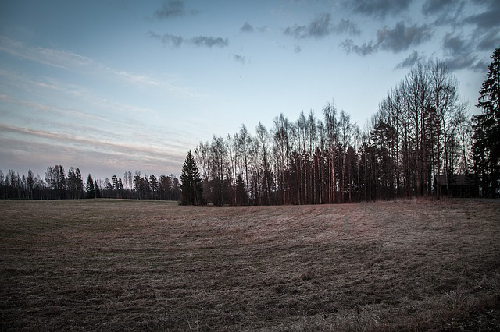
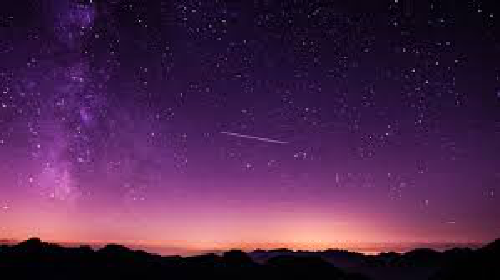

In [7]:
ipyplot.plot_images(images, img_width=250, labels=predictions)